# EXPLORACIÓN DE DATOS

## Librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Lectura 


In [2]:
mark = pd.read_csv('BankMarketing.csv', sep=";")
mark.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
mark.dtypes#tipo}
#colunmas categoricas 
#colunmas numericas

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Contar valores perdidos

In [4]:
mark.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
mark.columns# nombre de columnas


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
mark["job"].unique()#valores unicos

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [7]:
mark["marital"].unique()#unknown

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [8]:
mark["education"].unique()#unknown

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
mark["default"].unique()#unknown

array(['no', 'unknown', 'yes'], dtype=object)

In [10]:
mark["housing"].unique()#unknown

array(['no', 'yes', 'unknown'], dtype=object)

In [11]:
mark["loan"].unique()#unknown

array(['no', 'yes', 'unknown'], dtype=object)

In [12]:
mark["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [13]:
mark["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

### Imputar con la moda

In [3]:
filtro= mark[mark['marital'] != 'unknown']
moda = filtro['marital'].mode()[0]
#Reemplazar
mark['marital'] = mark['marital'].replace('unknown', moda)
moda

'married'

In [14]:
categorical_columns = mark.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if 'unknown' in mark[column].values:
        # Filtrar los valores 'unknown' en la columna
        filtered_column = mark[mark[column] != 'unknown']
        
        # Encontrar la moda de la columna sin 'unknown'
        moda = filtered_column[column].mode()[0]
        
        # Reemplazar 'unknown' con la moda en la columna
        mark[column] = mark[column].replace('unknown', moda)
print(mark.head())

   age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school      no      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

## Descripciones estadisticas de las variables

In [15]:
mark.describe(include='all')#para variables numericas

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10752,25008,13899,41185,22566,34940,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [16]:
#variables categoricas
categoria= mark.select_dtypes(include=['object','category']).columns
esta= mark[categoria].describe()
esta

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,25008,13899,41185,22566,34940,26144,13769,8623,35563,36548


## Visualizacion de datos

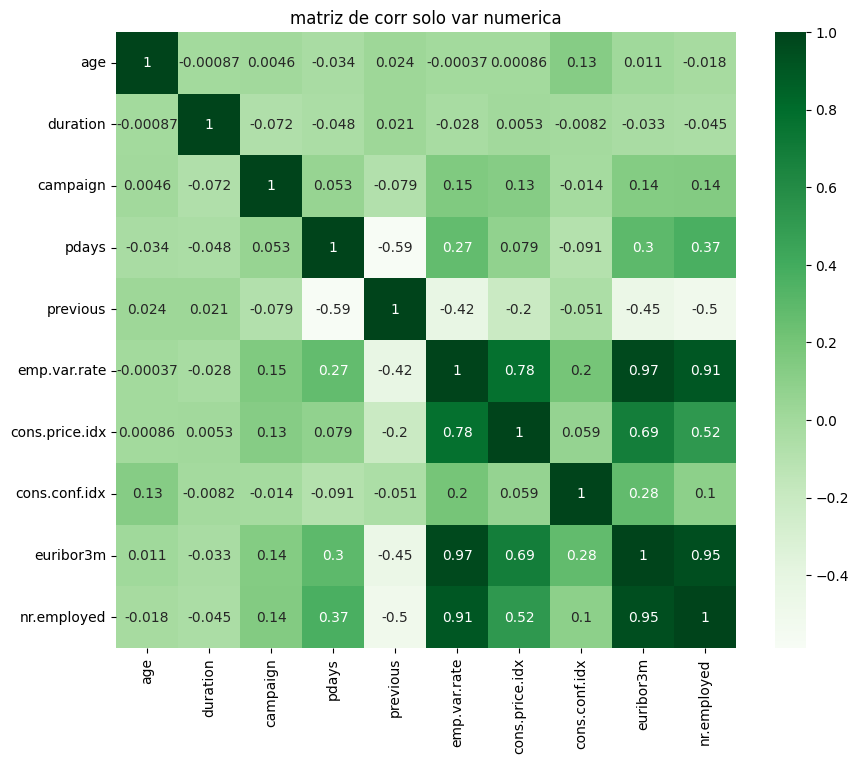

In [17]:
numerica = mark.select_dtypes(include=['int64', 'float64'])
corr1 = numerica.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, cmap='Greens')
plt.title('matriz de corr solo var numerica')
plt.show()

In [ ]:
# 0.91
# 0.95
# 0.97

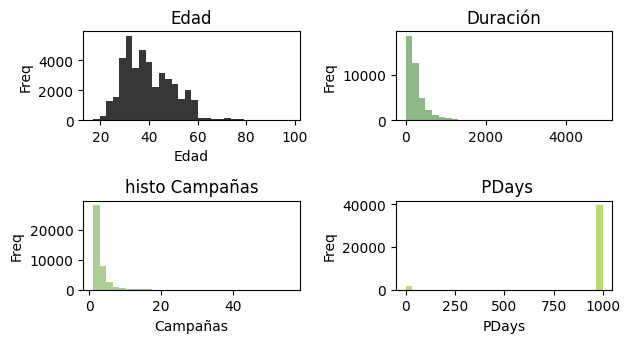

In [19]:
plt.subplot(3, 2, 1)
plt.hist(mark['age'], bins=30, color='#373737')
plt.title('Edad')
plt.xlabel('Edad')
plt.ylabel('Freq')
plt.subplot(3, 2, 2)
plt.hist(mark['duration'], bins=30, color='#8db986')
plt.title('Duración')

plt.ylabel('Freq')
plt.subplot(3, 2, 3)
plt.hist(mark['campaign'], bins=30, color='#acce91')
plt.title('histo Campañas')
plt.xlabel('Campañas')
plt.ylabel('Freq')
plt.subplot(3, 2, 4)
plt.hist(mark['pdays'], bins=30, color='#badb73')
plt.title(' PDays')
plt.xlabel('PDays')
plt.ylabel('Freq')

plt.tight_layout()
plt.show()

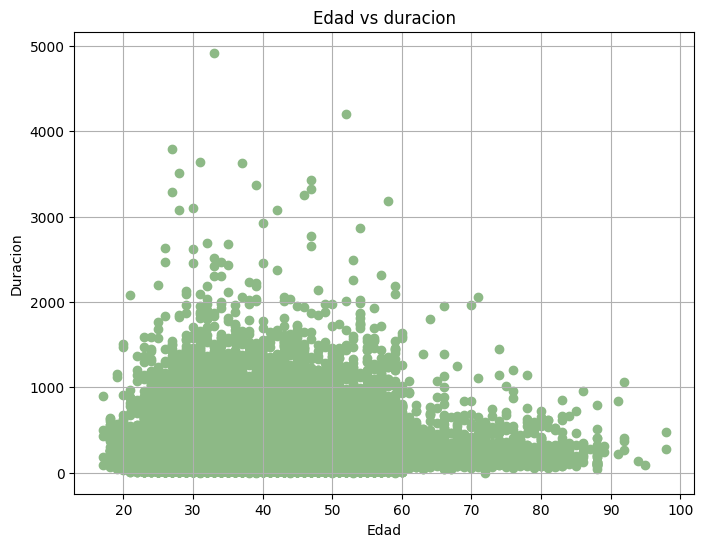

In [20]:
#Dispersion  Relacion entreedad y duracion
# Relacion no lineal

plt.figure(figsize=(8, 6))
plt.scatter(mark['age'], mark['duration'], color='#8db986')
plt.title('Edad vs duracion')
plt.xlabel('Edad')
plt.ylabel('Duracion')
plt.grid(True)
plt.show()

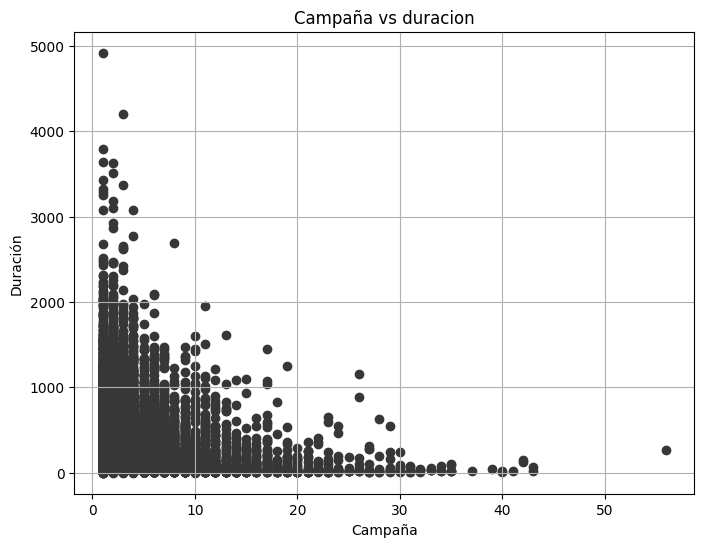

In [22]:
##campaign y duration
# relacion no lineal
plt.figure(figsize=(8, 6))
plt.scatter(mark['campaign'], mark['duration'],color='#373737')
plt.title('Campaña vs duracion')
plt.xlabel('Campaña')
plt.ylabel('Duración')
plt.grid(True)
plt.show()

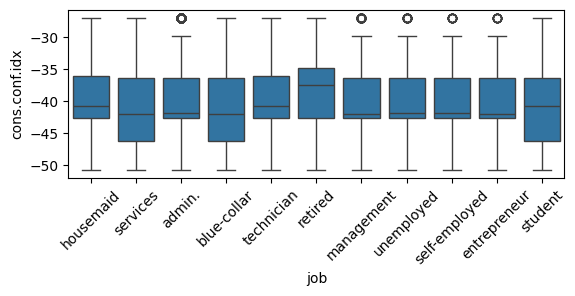

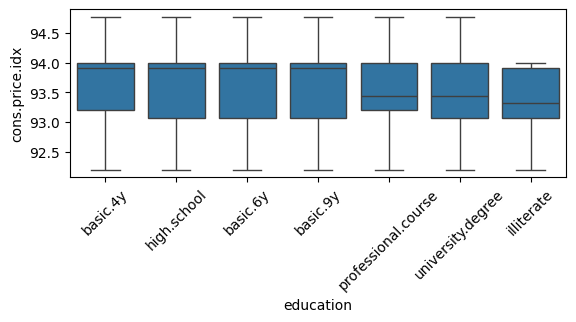

In [24]:
plt.subplot(2, 1, 1)
sns.boxplot(mark, x = 'job', y = 'cons.conf.idx')
plt.xticks(rotation=45)
plt.show()

plt.subplot(2, 1, 2)
sns.boxplot(mark, x = 'education', y = 'cons.price.idx')
plt.xticks(rotation=45)
plt.show()

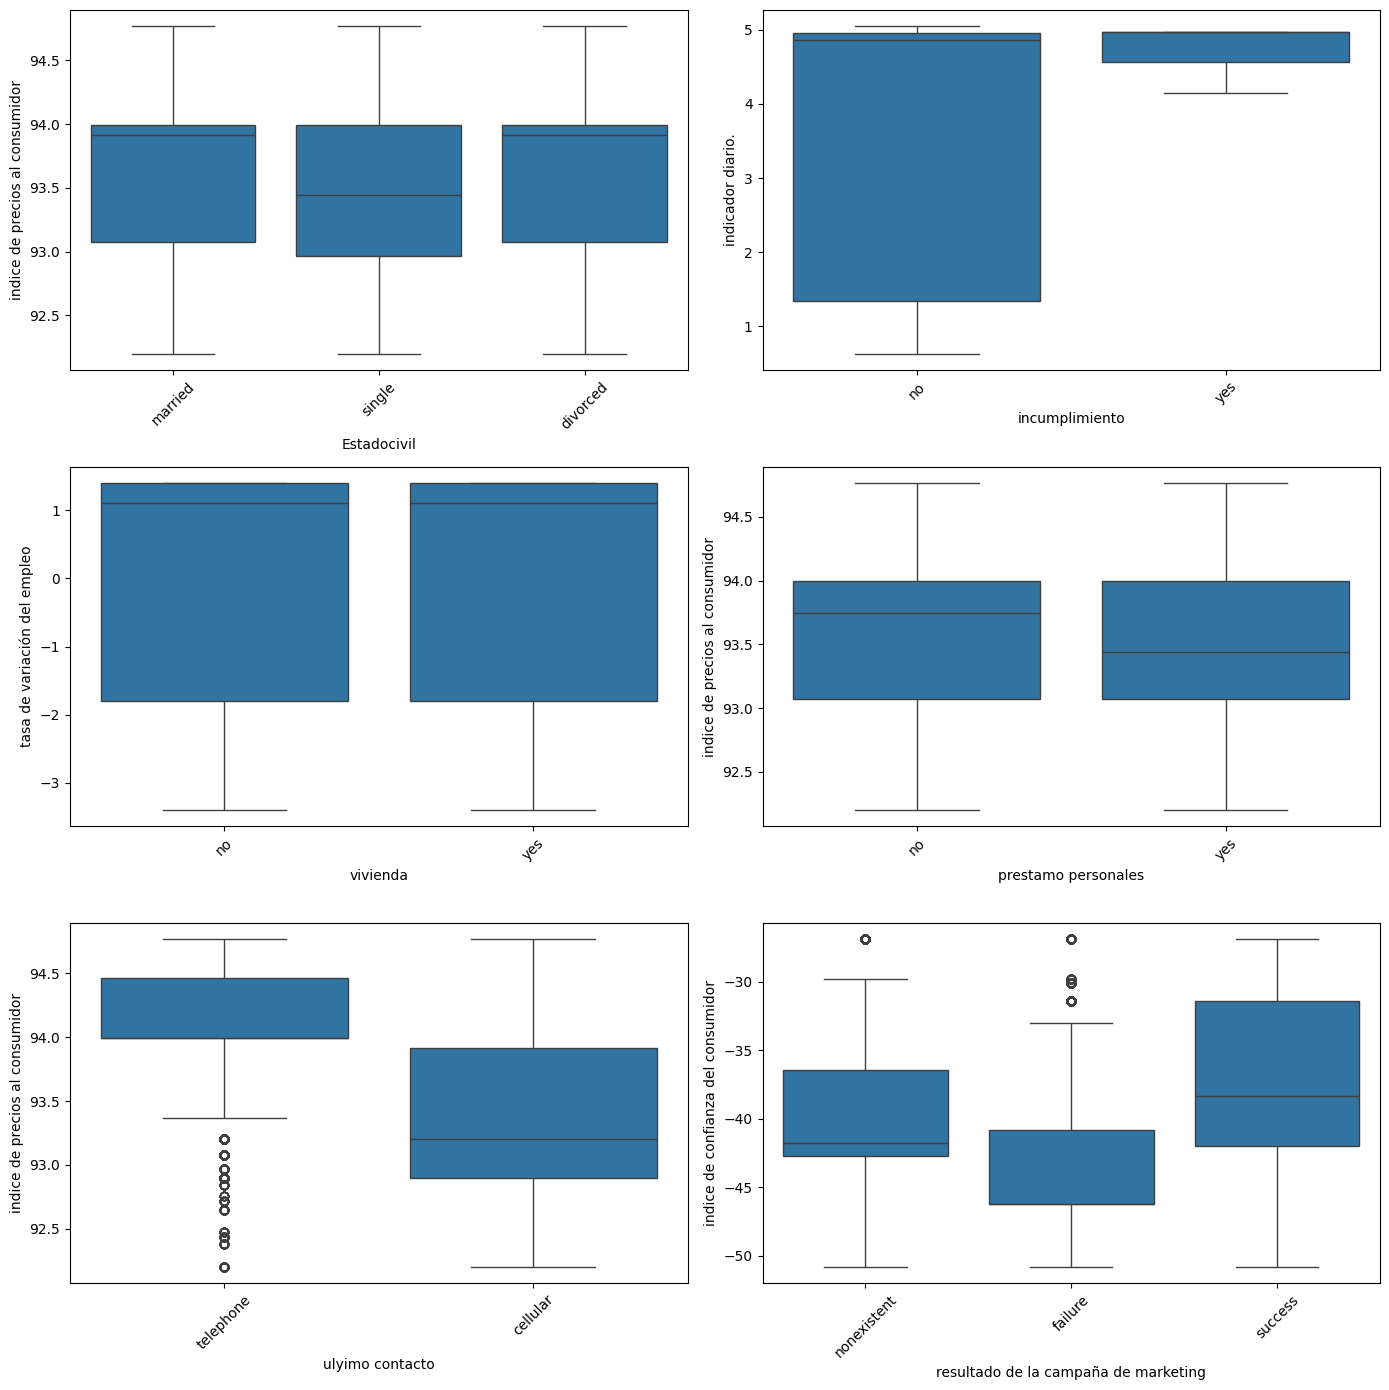

In [25]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 2, 1)
sns.boxplot(data=mark, x='marital', y='cons.price.idx')
plt.xlabel('Estadocivil')
plt.ylabel('indice de precios al consumidor')
plt.xticks(rotation=45)
plt.subplot(3, 2, 2)
sns.boxplot(data=mark, x='default', y='euribor3m')
plt.xlabel('incumplimiento')
plt.ylabel('indicador diario.')
plt.xticks(rotation=45)
plt.subplot(3, 2, 3)
sns.boxplot(data=mark, x='housing', y='emp.var.rate')
plt.xlabel('vivienda')
plt.ylabel('tasa de variación del empleo')
plt.xticks(rotation=45)
plt.subplot(3, 2, 4)
sns.boxplot(data=mark, x='loan', y='cons.price.idx')
plt.xlabel('prestamo personales')
plt.ylabel('indice de precios al consumidor')
plt.xticks(rotation=45)
plt.subplot(3, 2, 5)
sns.boxplot(data=mark, x='contact', y='cons.price.idx')
plt.xlabel('ulyimo contacto')
plt.ylabel('indice de precios al consumidor')
plt.xticks(rotation=45)
plt.subplot(3, 2, 6)
sns.boxplot(data=mark, x='poutcome', y='cons.conf.idx')
plt.xlabel('resultado de la campaña de marketing')
plt.ylabel('indice de confianza del consumidor')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

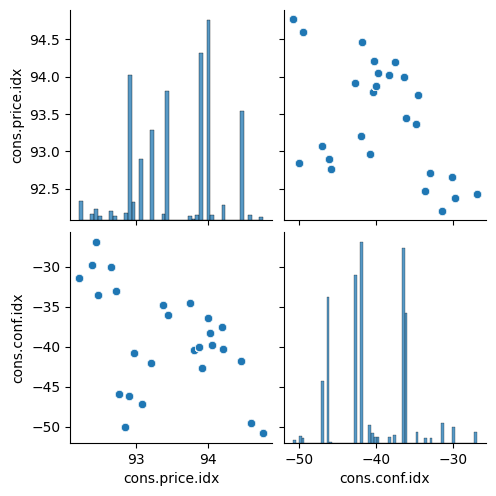

In [26]:
sns.pairplot(mark, vars = ['cons.price.idx','cons.conf.idx'])
plt.show()

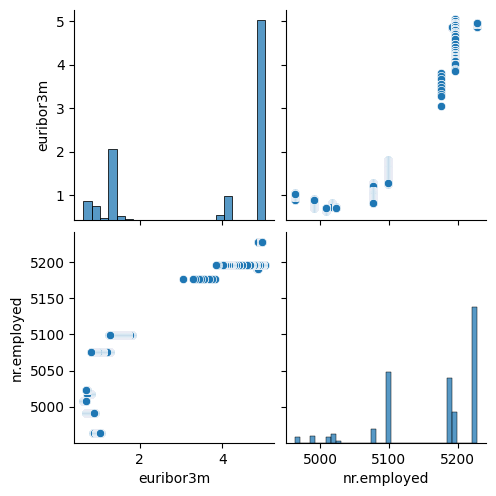

In [27]:
sns.pairplot(mark, vars = ['euribor3m','nr.employed'])
plt.show()

# Preprocesamiento

## Feature Engineering (incompleto)

In [90]:
mark["emp.var.rate"]
#multiplicar variables con altas correlaciones
#buscar formulas
#investigar 

0        1.1
1        1.1
2        1.1
3        1.1
4        1.1
        ... 
41183   -1.1
41184   -1.1
41185   -1.1
41186   -1.1
41187   -1.1
Name: emp.var.rate, Length: 41188, dtype: float64

## Preprocesamiento de datos

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
varnumericas = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                    'euribor3m', 'nr.employed']

scaler = StandardScaler()
mark[varnumericas] = scaler.fit_transform(mark[varnumericas])

In [30]:
varcategoricas = ['default', 'housing', 
                        'loan',  'y',"contact"]

mark= pd.get_dummies(mark, columns=varcategoricas, drop_first=True)


In [31]:
mark.head()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_yes,housing_yes,loan_yes,y_yes,contact_telephone
0,1.533034,housemaid,married,basic.4y,may,mon,0.010471,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1
1,1.628993,services,married,high.school,may,mon,-0.421501,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1
2,-0.290186,services,married,high.school,may,mon,-0.124520,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,1,0,0,1
3,-0.002309,admin.,married,basic.6y,may,mon,-0.413787,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1
4,1.533034,services,married,high.school,may,mon,0.187888,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,1,0,1


In [ ]:
##mapeo variables categoricas 

In [32]:
mapeo_job = {
    'housemaid': 1, 
    'services': 2, 
    'admin.': 3, 
    'blue-collar': 4, 
    'technician': 5,
    'retired': 6,
    'management': 7, 
    'unemployed': 8, 
    'self-employed': 9, 
    'entrepreneur': 10,
    'student': 11
}

mark['job'] = mark['job'].replace(mapeo_job)

In [33]:
mapeo_marital = {
'married':1, 
'single':2, 
'divorced':3
}

mark['marital'] = mark['marital'].replace(mapeo_marital)

In [34]:
mapeo_education = {
'basic.4y':1,
'high.school':2,
'basic.6y':3, 
'basic.9y':4,
'professional.course':5, 
'university.degree':6,
'illiterate':7
}

mark['education'] = mark['education'].replace(mapeo_education)

In [35]:
mapeo_poutcome = {
'nonexistent':1, 
'failure':2, 
'success':3}
mark['poutcome'] = mark['poutcome'].replace(mapeo_poutcome)

In [36]:
mark.head()

,age,job,marital,education,month,day_of_week,duration,campaign,pdays,previous,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_yes,housing_yes,loan_yes,y_yes,contact_telephone
0,1.533034,1,1,1,may,mon,0.010471,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1
1,1.628993,2,1,2,may,mon,-0.421501,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1
2,-0.290186,2,1,2,may,mon,-0.124520,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,1,0,0,1
3,-0.002309,3,1,3,may,mon,-0.413787,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1
4,1.533034,2,1,2,may,mon,0.187888,-0.565922,0.195414,-0.349494,...,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,1,0,1


In [ ]:
#variable fecha (incompleto)

In [37]:
from datetime import datetime

In [38]:
fecha_actual = datetime.now()
fecha_actual

datetime.datetime(2024, 5, 25, 15, 56, 14, 809060)

In [39]:
mark['fecha'] = pd.to_datetime(mark['month'] + ' ' + mark['day_of_week'] + ', 2024', format='%b %a, %Y')
mark[['month', 'day_of_week', 'fecha']].head()

,month,day_of_week,fecha
0,may,mon,2024-05-01
1,may,mon,2024-05-01
2,may,mon,2024-05-01
3,may,mon,2024-05-01
4,may,mon,2024-05-01


In [41]:
fecha_actual = datetime.now()
mark['fecha'] = (fecha_actual - mark['fecha']).dt.days // 365


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [41]:
#solo una vezz
mark.drop(['month', 'day_of_week'], axis=1, inplace=True)

In [42]:
mark.head()

,age,job,marital,education,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_yes,housing_yes,loan_yes,y_yes,contact_telephone,fecha
0,1.533034,1,1,1,0.010471,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1,0
1,1.628993,2,1,2,-0.421501,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1,0
2,-0.290186,2,1,2,-0.124520,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,1,0,0,1,0
3,-0.002309,3,1,3,-0.413787,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,0,0,1,0
4,1.533034,2,1,2,0.187888,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0,0,1,0,1,0


### Correlacion en las variables ya tratadas

In [ ]:
mark.corr()

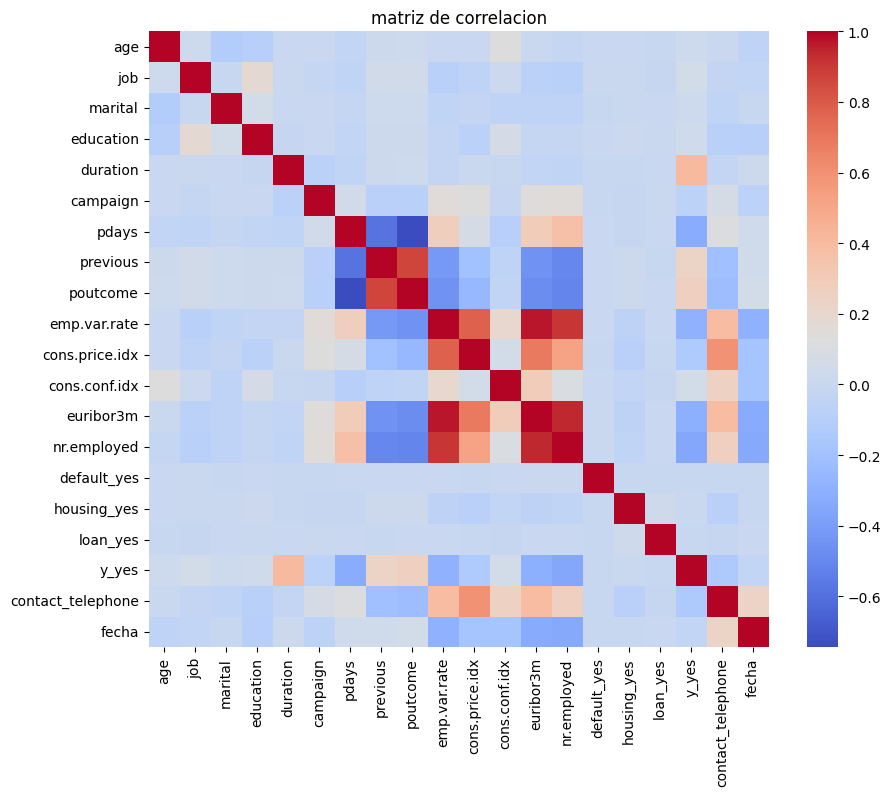

In [43]:
corr = mark.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,cmap='coolwarm')
plt.title('matriz de correlacion')
plt.show()

## Division

In [44]:
def split_dataset(data, test_size=0.2, validation_size=0.25, random_state=40):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['y_yes']), data['y_yes'], test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=random_state)
    
    return X_train, X_val, X_test, y_train, y_val, y_test